In [4]:
import asimov_database as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pr = ad.ParquetReader()

In [29]:
dataframe = pr.load_level_book(['WDOG20','DOLG20'], '2020-01-06')

In [3]:
dataframe.columns

Index(['ask_0', 'ask_quantity_0', 'ask_quantity_wdo_0', 'ask_wdo_0', 'bid_0',
       'bid_quantity_0', 'bid_quantity_wdo_0', 'bid_wdo_0', 'broker',
       'event_type', 'i', 'i_ask', 'i_ask_wdo', 'i_bid', 'i_bid_wdo', 'id',
       'index', 'msg_seq_num', 'order_id', 'order_ts', 'position', 'price',
       'quantity', 'side', 'status', 'symbol', 'ts'],
      dtype='object')

In [12]:
dataframe[['index','symbol', 'ask_0', 'id' ,'ask_quantity_0','ask_wdo_0', 'ask_quantity_wdo_0', 'bid_0',
       'bid_quantity_0','bid_wdo_0',  'bid_quantity_wdo_0', 'broker',
       'event_type', 'msg_seq_num', 'order_id',  'position', 'price',
       'quantity', 'side', 'status']][dataframe['bid_wdo_0']  != 0 ]

,index,symbol,ask_0,id,ask_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_0,bid_quantity_0,bid_wdo_0,bid_quantity_wdo_0,broker,event_type,msg_seq_num,order_id,position,price,quantity,side,status
3,2020-01-06 11:55:02.056000+00:00,WDO,4063.5,125810967,5.0,4020.0,27.0,4027.0,20.0,4052.0,1.0,386.0,INSERT,13503,7.444918e+11,1.0,4052.0,1.0,B,None
4,2020-01-06 11:55:02.061000+00:00,WDO,4063.5,125810968,5.0,4020.0,27.0,4027.0,20.0,4052.0,1.0,386.0,INSERT,13504,7.444918e+11,2.0,4050.5,1.0,B,None
5,2020-01-06 11:55:02.093000+00:00,WDO,4063.5,125810969,5.0,4020.0,27.0,4027.0,20.0,4052.0,1.0,386.0,INSERT,13505,7.444918e+11,2.0,4075.0,1.0,A,None
6,2020-01-06 11:55:02.114000+00:00,WDO,4063.5,125810970,5.0,4020.0,27.0,4027.0,20.0,4052.0,1.0,386.0,INSERT,13506,7.444918e+11,3.0,4049.5,1.0,B,None
7,2020-01-06 11:55:02.149000+00:00,WDO,4063.5,125810971,5.0,4020.0,27.0,4027.0,20.0,4052.0,1.0,386.0,INSERT,13507,7.444918e+11,4.0,4031.0,1.0,B,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377276,2020-01-06 21:14:59.907000+00:00,DOL,4068.0,129469622,10.0,4067.5,14.0,4067.0,15.0,4066.5,15.0,16.0,INSERT,3347336,7.445152e+11,44.0,4074.5,50.0,A,None
3377277,2020-01-06 21:15:00.013000+00:00,DOL,4068.0,129469623,10.0,4067.5,14.0,4067.0,15.0,4066.5,15.0,16.0,STATUS,3347337,7.445152e+11,44.0,4074.5,50.0,A,FORBIDDEN
3377278,2020-01-06 21:15:00.013000+00:00,DOL,4068.0,129469623,10.0,4067.5,14.0,4067.0,15.0,4066.5,15.0,16.0,STATUS,3347337,7.445152e+11,44.0,4074.5,50.0,B,FORBIDDEN
3377279,2020-01-06 21:15:00.013000+00:00,WDO,4068.0,129469650,10.0,4067.5,14.0,4067.0,15.0,4066.5,15.0,3.0,STATUS,3347345,7.445152e+11,113.0,4063.0,4.0,A,FORBIDDEN


In [4]:
np.where(np.diff(dataframe['id']) < 0)

(array([], dtype=int64),)

In [5]:
# total_.reset_index().loc[begin:]

In [3]:
total = dataframe.copy()

In [4]:
total_ = total[['index', 'event_type', 'id', 'side', 'position', 'symbol', 'msg_seq_num', 'ask_0', 'ask_quantity_0', 'bid_0', 'bid_quantity_0', 'ask_wdo_0', 'ask_quantity_wdo_0', 'bid_wdo_0', 'bid_quantity_wdo_0']][ (total['ask_0'] != 0) & (total['bid_0'] != 0)]

total_['spread_dol'] = total['ask_0'] - total['bid_0']
total_['spread_wdo'] = total['ask_wdo_0'] - total['bid_wdo_0']


#Procura pelo primeiro momento de mercado estável
begin = np.where( (total_['spread_wdo'] == 0.5) & (total_['spread_dol'] == 0.5) & (total_['ask_0'] == total_['ask_wdo_0']) & (total_['bid_0'] == total_['bid_wdo_0']))[0][0]

total_.rename({'index' : 'timestamp'}, axis = 1, inplace = True)

total_.reset_index(inplace=True)
# Inicia análise no primeiro momento de estabilidade

slice_ = total_.loc[begin:]

#Calcula mid price
slice_['mid_price'] = (slice_['ask_0'] + slice_['bid_0'])/2.0
slice_['mid_price_wdo'] = (slice_['ask_wdo_0'] + slice_['bid_wdo_0'])/2.0

#         self.total__= slice_


#Filtras msg_seq_number e observa apenas o ultimo evento ocorrido
slice_['repeat'] = False
slice_['repeat'][slice_['msg_seq_num'] != slice_['msg_seq_num'].shift(-1)] = True
slice_  = slice_[slice_['repeat']]
# slice_ = slice_.drop(['repeat', 'event_type', 'symbol', 'side'], axis =1).reset_index()


/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [5]:
slice_.reset_index(inplace=True)
slice_.drop({'index', 'level_0'}, axis =1, inplace=True)

In [6]:
slice_.head(10)

,timestamp,event_type,id,side,position,symbol,msg_seq_num,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo,repeat
0,2020-01-06 12:00:50.186000+00:00,INSERT,125819173,B,1.0,WDO,21223,4065.0,5.0,4064.5,5.0,4065.0,22.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
1,2020-01-06 12:00:50.186000+00:00,CHANGE,125819174,A,1.0,WDO,21224,4065.0,5.0,4064.5,5.0,4065.0,17.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
2,2020-01-06 12:00:50.186000+00:00,CHANGE,125819175,A,1.0,WDO,21225,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
3,2020-01-06 12:00:50.186000+00:00,DELETE,125819176,B,2.0,WDO,21226,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
4,2020-01-06 12:00:50.186000+00:00,DELETE,125819177,B,1.0,WDO,21227,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.0,118.0,0.5,1.0,4064.75,4064.50,True
5,2020-01-06 12:00:50.186000+00:00,CHANGE,125819179,A,1.0,WDO,21228,4065.0,5.0,4064.5,5.0,4065.0,5.0,4064.0,118.0,0.5,1.0,4064.75,4064.50,True
6,2020-01-06 12:00:50.186000+00:00,INSERT,125819181,A,78.0,DOL,21229,4065.0,5.0,4064.5,5.0,4065.0,5.0,4064.0,118.0,0.5,1.0,4064.75,4064.50,True
7,2020-01-06 12:00:50.186000+00:00,INSERT,125819182,B,11.0,DOL,21230,4065.0,5.0,4064.5,5.0,4065.0,5.0,4064.0,118.0,0.5,1.0,4064.75,4064.50,True
8,2020-01-06 12:00:50.186000+00:00,DELETE,125819183,A,16.0,WDO,21231,4065.0,5.0,4064.5,5.0,4065.0,5.0,4064.0,118.0,0.5,1.0,4064.75,4064.50,True
9,2020-01-06 12:00:50.186000+00:00,DELETE,125819184,B,4.0,WDO,21232,4065.0,5.0,4064.5,5.0,4065.0,5.0,4064.0,98.0,0.5,1.0,4064.75,4064.50,True


In [9]:
last = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))[0][-1]


In [10]:
slice_

,timestamp,event_type,id,side,position,symbol,msg_seq_num,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo,repeat
0,2020-01-06 12:00:50.186000+00:00,INSERT,125819173,B,1.0,WDO,21223,4065.0,5.0,4064.5,5.0,4065.0,22.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
1,2020-01-06 12:00:50.186000+00:00,CHANGE,125819174,A,1.0,WDO,21224,4065.0,5.0,4064.5,5.0,4065.0,17.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
2,2020-01-06 12:00:50.186000+00:00,CHANGE,125819175,A,1.0,WDO,21225,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
3,2020-01-06 12:00:50.186000+00:00,DELETE,125819176,B,2.0,WDO,21226,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.5,5.0,0.5,0.5,4064.75,4064.75,True
4,2020-01-06 12:00:50.186000+00:00,DELETE,125819177,B,1.0,WDO,21227,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.0,118.0,0.5,1.0,4064.75,4064.50,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087745,2020-01-06 21:14:59.807000+00:00,DELETE,129469620,A,1.0,WDO,3347334,4068.0,10.0,4067.0,15.0,4067.5,14.0,4066.5,15.0,1.0,1.0,4067.50,4067.00,True
3087746,2020-01-06 21:14:59.847000+00:00,DELETE,129469621,B,113.0,WDO,3347335,4068.0,10.0,4067.0,15.0,4067.5,14.0,4066.5,15.0,1.0,1.0,4067.50,4067.00,True
3087747,2020-01-06 21:14:59.907000+00:00,INSERT,129469622,A,44.0,DOL,3347336,4068.0,10.0,4067.0,15.0,4067.5,14.0,4066.5,15.0,1.0,1.0,4067.50,4067.00,True
3087748,2020-01-06 21:15:00.013000+00:00,STATUS,129469623,B,44.0,DOL,3347337,4068.0,10.0,4067.0,15.0,4067.5,14.0,4066.5,15.0,1.0,1.0,4067.50,4067.00,True


In [7]:
slice_ = slice_.loc[:3073745]

In [12]:
slice_.tail()

,timestamp,event_type,id,side,position,symbol,msg_seq_num,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo,repeat
3073741,2020-01-06 21:00:50.994000+00:00,DELETE,129452760,B,9.0,WDO,3332653,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,71.0,0.5,0.5,4069.75,4069.75,True
3073742,2020-01-06 21:00:50.994000+00:00,DELETE,129452761,B,9.0,WDO,3332654,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,67.0,0.5,0.5,4069.75,4069.75,True
3073743,2020-01-06 21:00:50.994000+00:00,DELETE,129452762,B,7.0,WDO,3332655,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,63.0,0.5,0.5,4069.75,4069.75,True
3073744,2020-01-06 21:00:50.994000+00:00,DELETE,129452763,A,15.0,DOL,3332656,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,63.0,0.5,0.5,4069.75,4069.75,True
3073745,2020-01-06 21:00:51.003000+00:00,INSERT,129452764,A,55.0,WDO,3332657,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,63.0,0.5,0.5,4069.75,4069.75,True


In [10]:
# Append values to specific position in array

# pos_first_events = np.insert(pos_first_events, 0, 4, axis=0)

In [13]:
# Posicoes de algum dos spreads abertos
index_trade = np.where((slice_['spread_dol'] != 0.5) | (slice_['spread_wdo'] != 0.5) )[0]
#Procura as posicoes no vetor anterior, onde os momento de spread aberto nao sao consecutivos
position_trade = np.where(np.diff(np.where((slice_['spread_dol'] != 0.5) | (slice_['spread_wdo'] != 0.5) )) != 1)[1] +1

#Procura os indices que no dataframe correspondem ao primeiro momento dos eventos de spread aberto
Open_Spread = []
for i in position_trade:
    Open_Spread.append(index_trade[i])
    
Open_Spread = np.insert(Open_Spread, 0, index_trade[0], axis=0)

In [14]:
Open_Spread

array([      4,      12,      17, ..., 3073564, 3073639, 3073692])

In [15]:
# Posicoes do mercado 100% estavel
index_stable  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))[0]

#Procura as posicoes no vetor anterior, onde os momento de spread aberto nao sao consecutivos
position_stable = np.where(np.diff(np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))
) != 1)[1] + 1

In [16]:
#Procura os indices que no dataframe correspondem ao primeiro momento dos eventos de estabilidade
all_stable = []
for i in position_stable:
    all_stable.append(index_stable[i])
    
all_stable = np.insert(all_stable, 0, index_stable[0], axis=0)

In [17]:
# Procura por spreado fechado
index_spread_closed = np.where((slice_['spread_dol'] == 0.5) & (slice_['spread_wdo'] == 0.5) )[0]

position_closed = np.where(np.diff(np.where((slice_['spread_dol'] == 0.5) & (slice_['spread_wdo'] == 0.5) )) != 1)[1] +1

#Procura os indices que no dataframe correspondem ao primeiro momento dos eventos de spread aberto
Closed_Spread = []
for i in position_closed:
    Closed_Spread.append(index_spread_closed[i])
    
Closed_Spread = np.insert(Closed_Spread, 0, index_spread_closed[0], axis=0)


In [18]:
Closed_Spread

array([      0,      11,      14, ..., 3073567, 3073641, 3073695])

In [19]:
# Diferenca entra todos momentos de ambos os spread fechados e todos os momentos de total estabilidade do mercado -- 
#retornando apenas momentos de spread fechado com instantes de estabilidade

list_ = list(set(Closed_Spread).difference(set(all_stable)))

In [20]:
list_.sort()

In [21]:
position_final = np.where( np.diff(list_) !=1)[0] + 1
# #Procura os indices que no dataframe correspondem ao primeiro momento dos eventos de instabilidade
#Calcula o primeiro momento de mercado distocido com spread fechado

init_distortion = []
for i in position_final:
    init_distortion.append(list_[i])
    
init_distortion = np.insert(init_distortion, 0, list_[0], axis=0)

In [22]:
np.where(index_spread_closed == 3072822)

(array([2697717]),)

In [23]:
slice_[ (slice_.index.isin(init_distortion))]

,timestamp,event_type,id,side,position,symbol,msg_seq_num,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo,repeat
11,2020-01-06 12:00:50.186000+00:00,INSERT,125819187,B,1.0,WDO,21234,4065.0,5.0,4064.5,5.0,4065.5,31.0,4065.0,2.0,0.5,0.5,4064.75,4065.25,True
14,2020-01-06 12:00:50.186000+00:00,INSERT,125819191,A,1.0,WDO,21237,4065.0,5.0,4064.5,5.0,4064.5,5.0,4064.0,98.0,0.5,0.5,4064.75,4064.25,True
455,2020-01-06 12:00:50.507000+00:00,INSERT,125819699,A,1.0,DOL,21708,4063.5,5.0,4063.0,5.0,4064.0,35.0,4063.5,50.0,0.5,0.5,4063.25,4063.75,True
737,2020-01-06 12:00:50.812000+00:00,INSERT,125820060,A,1.0,DOL,22032,4063.0,5.0,4062.5,10.0,4063.5,50.0,4063.0,43.0,0.5,0.5,4062.75,4063.25,True
1059,2020-01-06 12:00:51.509000+00:00,INSERT,125820429,A,1.0,WDO,22384,4062.5,5.0,4062.0,5.0,4063.0,16.0,4062.5,6.0,0.5,0.5,4062.25,4062.75,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072693,2020-01-06 21:00:07.637000+00:00,INSERT,129451475,A,1.0,WDO,3331516,4071.0,55.0,4070.5,15.0,4070.5,1.0,4070.0,219.0,0.5,0.5,4070.75,4070.25,True
3072759,2020-01-06 21:00:08.018000+00:00,INSERT,129451554,A,1.0,WDO,3331587,4070.5,20.0,4070.0,90.0,4070.0,20.0,4069.5,114.0,0.5,0.5,4070.25,4069.75,True
3072777,2020-01-06 21:00:08.024000+00:00,INSERT,129451576,A,1.0,WDO,3331605,4070.5,30.0,4070.0,90.0,4070.0,9.0,4069.5,139.0,0.5,0.5,4070.25,4069.75,True
3073286,2020-01-06 21:00:34.273000+00:00,INSERT,129452214,A,1.0,WDO,3332162,4070.0,35.0,4069.5,20.0,4069.5,10.0,4069.0,80.0,0.5,0.5,4069.75,4069.25,True


In [24]:
indexex = slice_[ (slice_.index.isin(init_distortion)) & (slice_['position'] == 1) & (slice_['event_type'] == 'INSERT') ].index

In [25]:
indexex[:25]

Int64Index([  11,   14,  455,  737, 1059, 1093, 1128, 1206, 2096, 3206, 3339,
            3508, 3528, 3635, 4105, 4148, 4288, 4935, 5162, 5294, 5317, 5748,
            5991, 6003, 6348],
           dtype='int64')

In [26]:
all_stable =  np.delete(all_stable, 0)
all_stable[:5]

array([4132, 6324, 6334, 6395, 6612])

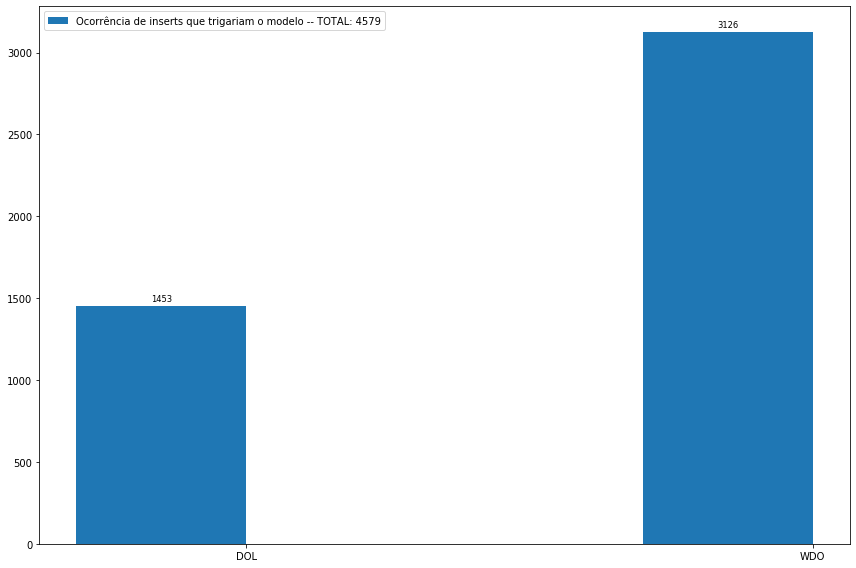

In [27]:
wdo_count = slice_[slice_.index.isin(indexex)]['symbol'].value_counts()[0]
dol_count = slice_[slice_.index.isin(indexex)]['symbol'].value_counts()[1]
labels = ['DOL', 'WDO']# [i for i in range(1, (aux2[aux2['mover'] == -1]['qntd'].shape[0])-12)] 
qntd_insert = [dol_count,wdo_count]
# qntd_ocorrencias = [aux10[0], aux12[0], aux14[0]]

x = np.arange(len(labels))  # the label locations
width = 0.3# the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, qntd_insert, width, label='Ocorrência de inserts que trigariam o modelo -- TOTAL: {}'.format(dol_count+wdo_count) )
# rects2 = ax.bar(x + width/2, qntd_ocorrencias, width, label='Total de vezes que o WDO esteve acima do DOL')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Quantidade')
# ax.set_title('Frequências das qnd de insert em momento de distorção com DOL acima')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 2)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize='small')

autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [28]:
len(init_distortion),len(indexex)

(4584, 4579)

In [29]:
dict_view = {}
for i in range(len(indexex)):
    dict_view[i] = slice_.loc[indexex[i]-1:indexex[i]]

In [30]:
dict_view[20]

,timestamp,event_type,id,side,position,symbol,msg_seq_num,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo,repeat
5316,2020-01-06 12:00:58.051000+00:00,INSERT,125825257,A,2.0,WDO,26830,4062.0,35.0,4061.5,25.0,4063.0,14.0,4062.0,56.0,0.5,1.0,4061.75,4062.50,True
5317,2020-01-06 12:00:58.051000+00:00,INSERT,125825258,A,1.0,WDO,26831,4062.0,35.0,4061.5,25.0,4062.5,4.0,4062.0,56.0,0.5,0.5,4061.75,4062.25,True


In [31]:
# Cria dict de dataframes iniciando no primeiro momento de distorção
i= 0
dict_teste = {}
for i in range(len(indexex)):
    dict_teste[i] = slice_.loc[indexex[i]:]
#     print(indexex[i])

In [32]:
# Procura em cada dataframe criado acima a primeira posição de mercado estavel 
A = []
for i in dict_teste.keys():
    #A.append(dict_teste[i][ (dict_teste[i]['spread_wdo'] == 0.5) & (dict_teste[i]['spread_dol'] == 0.5) & (dict_teste[i]['ask_0'] == dict_teste[i]['ask_wdo_0']) & (dict_teste[i]['bid_0'] == dict_teste[i]['bid_wdo_0']) ].index[0])
    A.append(np.where( (dict_teste[i]['spread_wdo'] == 0.5) & (dict_teste[i]['spread_dol'] == 0.5) & (dict_teste[i]['ask_0'] == dict_teste[i]['ask_wdo_0']) & (dict_teste[i]['bid_0'] == dict_teste[i]['bid_wdo_0']))[0][0])


In [33]:
# Procura no dataframe o indice corresponde a posiçao no vetor calculado a cima
B = []
for i in dict_teste.keys():
    B.append(dict_teste[i].index[A[i]])

In [34]:
#Dataframe com todos os momentos de fechamento das distorções
trial = pd.DataFrame(B)

In [35]:
trial.rename({0:'index_'}, axis =1, inplace=True)

In [36]:
# Checa para ver quais distorções possuem o mesmo momento de fechamento e
trial['repeat'] = False
trial['repeat'][trial['index_'] != trial['index_'].shift(-1)] = True
# trial  = trial[trial['repeat']]

/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
trial['teste'] = trial['repeat'].shift(1)

In [38]:
trial.head()

,index_,repeat,teste
0,4132,False,NaN
1,4132,False,False
2,4132,False,False
3,4132,False,False
4,4132,False,False


In [39]:
#Seleciona apenas a primeira distorçao 
final_position=trial[trial['teste'] != False].index

In [40]:
final_position

Int64Index([   0,   15,   24,   25,   26,   27,   29,   30,   35,   37,
            ...
            4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4577, 4578],
           dtype='int64', length=3598)

In [41]:
#Seleciona apenas os dataframes em que as distorções nao estao no meio de outra distorçao 
dict_events = {}
j = 0
for i in final_position:
    dict_events[j] = dict_teste[i]
    j+=1

In [42]:
# Calcula o posiçaõ de estabilidade do mercado em cada um dos eventos de distorção selecionados 
ultimas_posiciones = []
for i in dict_events.keys():
    ultimas_posiciones.append(np.where( (dict_events[i]['spread_wdo'] == 0.5) & (dict_events[i]['spread_dol'] == 0.5) & (dict_events[i]['ask_0'] == dict_events[i]['ask_wdo_0']) & (dict_events[i]['bid_0'] == dict_events[i]['bid_wdo_0']))[0][0])


In [121]:
# ultimas_posiciones

In [45]:
#Procura o indice nos dataframe correspondentes as posiçoes calculadas acima 
ultimas_posiciones_index = []
for i in dict_events.keys():
    ultimas_posiciones_index.append(dict_events[i].index[ultimas_posiciones[i]])

In [46]:
ultimas_posiciones_index[:10]

[4132, 6324, 6395, 6612, 6751, 7063, 7267, 7740, 8063, 9425]

In [47]:
# Faz o slice nos dataframe iniciando no distorçao e finalizando no mercado estavel 
dict_final = {}
for i in dict_events.keys():
    dict_final[i] = dict_events[i].loc[:ultimas_posiciones_index[i]]
   

In [48]:
# Calcula o valor absoluto da diferença, exponde assim quem seguiu o outro.
net_sub = {}
for i in dict_final.keys():
    net_sub[i] = pd.DataFrame(abs(dict_final[i][['mid_price', 'mid_price_wdo']].iloc[0] - dict_final[i][['mid_price', 'mid_price_wdo']].iloc[-1])).T   

In [49]:
#Seleciona apenas o primeiro evento
dict_symbols = {}
for i in dict_final.keys():
    dict_symbols[i] = dict_final[i].iloc[0:1]

In [50]:
wdo_count_unique = pd.concat(dict_symbols)['symbol'].value_counts()[0]
dol_count_unique = pd.concat(dict_symbols)['symbol'].value_counts()[1]

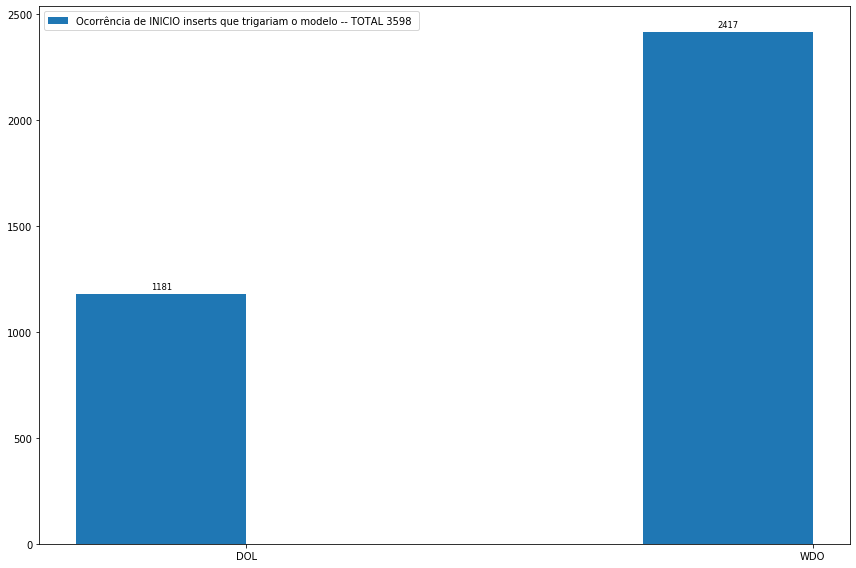

In [51]:
labels = ['DOL', 'WDO']# [i for i in range(1, (aux2[aux2['mover'] == -1]['qntd'].shape[0])-12)] 
qntd_insert = [dol_count_unique,wdo_count_unique]
# qntd_ocorrencias = [aux10[0], aux12[0], aux14[0]]

x = np.arange(len(labels))  # the label locations
width = 0.3# the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, qntd_insert, width, label='Ocorrência de INICIO inserts que trigariam o modelo -- TOTAL {} '.format(dol_count_unique+wdo_count_unique) )
# rects2 = ax.bar(x + width/2, qntd_ocorrencias, width, label='Total de vezes que o WDO esteve acima do DOL')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Quantidade')
# ax.set_title('Frequências das qnd de insert em momento de distorção com DOL acima')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 2)

autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [52]:
df_net_values = pd.concat(net_sub)

In [53]:
df_net_values

,,mid_price,mid_price_wdo
0,0,2.0,2.5
1,0,0.5,0.0
2,0,0.5,0.0
3,0,0.5,0.0
4,0,0.0,0.5
...,...,...,...
3593,0,0.0,0.5
3594,0,0.5,0.0
3595,0,0.0,0.5
3596,0,0.0,0.5


In [54]:
df_net_values['whos_bigger'] = 0
df_net_values.loc[df_net_values['mid_price']  > df_net_values['mid_price_wdo'], 'whos_bigger'] = 1

In [55]:
wdo_follow = df_net_values['whos_bigger'].value_counts()[0]
dol_follow =  df_net_values['whos_bigger'].value_counts()[1]

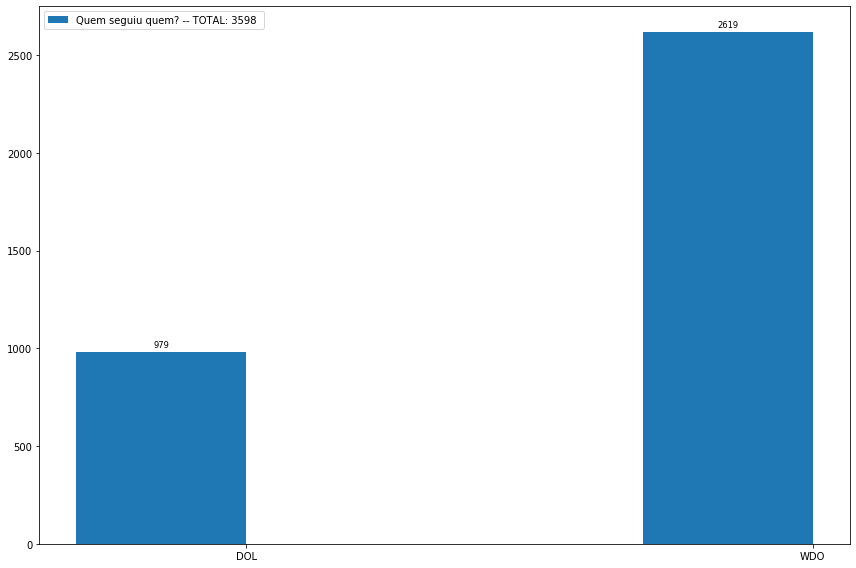

In [56]:

labels = ['DOL', 'WDO']# [i for i in range(1, (aux2[aux2['mover'] == -1]['qntd'].shape[0])-12)] 
qntd_insert = [dol_follow,wdo_follow]
# qntd_ocorrencias = [aux10[0], aux12[0], aux14[0]]

x = np.arange(len(labels))  # the label locations
width = 0.3# the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, qntd_insert, width, label='Quem seguiu quem? -- TOTAL: {} '.format(dol_follow+wdo_follow) )
# rects2 = ax.bar(x + width/2, qntd_ocorrencias, width, label='Total de vezes que o WDO esteve acima do DOL')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Quantidade')
# ax.set_title('Frequências das qnd de insert em momento de distorção com DOL acima')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 2)

autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

# Analise All Possible Trades

In [5]:
from asimov_strategy.managers.manager import Manager
manager = Manager()

[ Asynch ] STARTING THREAD. _run


In [9]:
all_trades_monte_carlo = manager._get_all_possible_trades('2020-01-06', 'Taker', {'signal' : 'book'})  
MSG_SEQ = []

for i in range(len(all_trades_monte_carlo)):
    MSG_SEQ.append(all_trades_monte_carlo[i].get('react_msg_seq_num'))

[ MANAGER ] Downloading results


In [10]:
unique_msg = list(set(MSG_SEQ))


In [6]:
def get_trades(dol, wdo, date_):
    trades = pr.get_parquet(symbol=dol,
                                date=date_,
                                type_='trades')
    md_trades = trades.read().to_pandas()
    trades_wdo = pr.get_parquet(symbol=wdo,
                                date=date_,
                                type_='trades')
    md_trades_wdo = trades_wdo.read().to_pandas()
    return md_trades, md_trades_wdo 


In [12]:
md_trades, md_trades_wdo = get_trades("DOLG20", "WDOG20", "2020-01-06")

In [13]:
all_trades =  pd.concat([md_trades,md_trades_wdo]).sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()

In [14]:
all_trades

,ts,msg_seq_num,symbol,trade_id,price,quantity,trade_ts,buyer,seller,crossed,deleted
0,2020-01-06 12:00:35.881000+00:00,15620,WDOG20,10,4062.0,10.0,12:00:35.878000,308,107,False,None
1,2020-01-06 12:00:35.881000+00:00,15620,WDOG20,20,4062.0,15.0,12:00:35.878000,3,107,False,None
2,2020-01-06 12:00:35.881000+00:00,15620,WDOG20,30,4062.0,1.0,12:00:35.878000,3,3701,False,None
3,2020-01-06 12:00:35.881000+00:00,15620,WDOG20,40,4062.0,10.0,12:00:35.878000,386,3701,False,None
4,2020-01-06 12:00:35.881000+00:00,15620,WDOG20,50,4062.0,1.0,12:00:35.878000,1982,3701,False,None
...,...,...,...,...,...,...,...,...,...,...,...
329239,2020-01-06 21:14:59.050000+00:00,3347315,WDOG20,2969750,4067.5,4.0,21:14:59.049000,3,3,False,None
329240,2020-01-06 21:14:59.050000+00:00,3347315,WDOG20,2969760,4067.5,1.0,21:14:59.049000,3,3,False,None
329241,2020-01-06 21:14:59.591000+00:00,3347323,WDOG20,2969770,4067.5,1.0,21:14:59.591000,3,3,False,None
329242,2020-01-06 21:14:59.591000+00:00,3347323,WDOG20,2969780,4067.5,4.0,21:14:59.591000,3,1618,False,None


In [15]:
list_of_trades = all_trades.groupby('msg_seq_num').sum().index


In [16]:
len(list_of_trades)

155635

In [17]:
len(unique_msg)

17769

In [20]:
list_of_trades[list_of_trades.isin(unique_msg)]

Int64Index([  20842,   21048,   21140,   21234,   23455,   24937,   25650,
              26808,   26809,   27536,
            ...
            3345170, 3345686, 3345754, 3346363, 3346504, 3346643, 3346677,
            3346767, 3347076, 3347140],
           dtype='int64', name='msg_seq_num', length=2029)

In [27]:
slice_[ slice_['msg_seq_num'].isin(unique_msg)]['event_type'].value_counts()

NameError: name 'slice_' is not defined

# Eventos de INSERT - MOVIMENTOS DOL E WDO

In [18]:
msg_number_wdo = slice_[ (slice_['msg_seq_num'].isin(unique_msg)) & (slice_['event_type'] == 'INSERT') & (slice_['symbol'] == 'WDO')]['msg_seq_num'].values
msg_number_dol = slice_[ (slice_['msg_seq_num'].isin(unique_msg)) & (slice_['event_type'] == 'INSERT') & (slice_['symbol'] == 'DOL')]['msg_seq_num'].values


In [19]:
len(msg_number_wdo), len(msg_number_dol)

(14487, 2329)

## COM TRADES E SEM TRADES

In [20]:
dict_filter_wdo = {}
j = 0
for i in range(len(all_trades_monte_carlo)):
    if all_trades_monte_carlo[i]['react_msg_seq_num'] in (msg_number_wdo):
        dict_filter_wdo[j] = all_trades_monte_carlo[i]
        j+=1
        
all_trades_wdo = []
for i in dict_filter_wdo.keys():
    all_trades_wdo.append(dict_filter_wdo[i])

In [21]:
dict_filter_dol = {}
j = 0
for i in range(len(all_trades_monte_carlo)):
    if all_trades_monte_carlo[i]['react_msg_seq_num'] in (msg_number_dol):
        dict_filter_dol[j] = all_trades_monte_carlo[i]
        j+=1
        
all_trades_dol = []
for i in dict_filter_dol.keys():
    all_trades_dol.append(dict_filter_dol[i])

## Distribuição das qntas

In [24]:
events_wdo = pr.get_parquet('WDOG20', "2020-01-06", "events")["incremental"].read().to_pandas()

dict_map_qtd = events_wdo.set_index("msg_seq_num").to_dict()["quantity"]
df_all_trades = pd.DataFrame(all_trades_wdo)
df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

dict_aux = df_all_trades.T.to_dict()

all_trades_qnt = []
for i in dict_aux.keys():
    all_trades_qnt.append(dict_aux[i])

In [25]:
A = []
for i in range(len(all_trades_qnt)):
    A.append(all_trades_qnt[i]['qntd'])

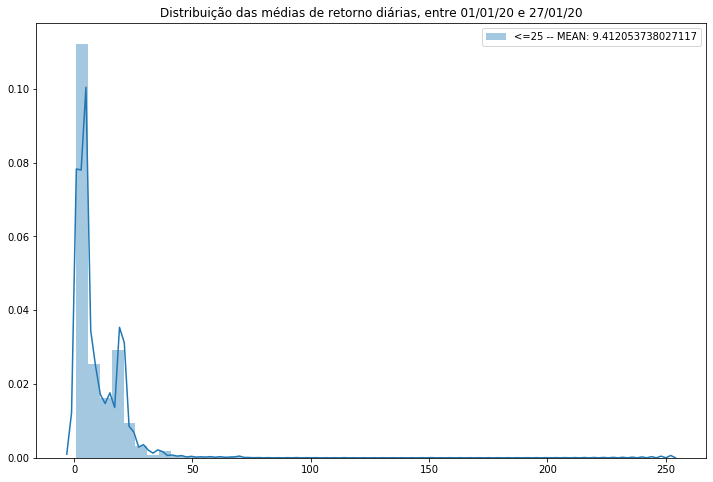

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

sns.distplot(A, label = '<=25 -- MEAN: {}'.format(np.mean(A)) )


ax.set_title('Distribuição das médias de retorno diárias, entre 01/01/20 e 27/01/20')
# sns.distplot(C_, label = 'All')
ax.legend()

In [7]:
def fetch_with_fillrate(fillrate_w, fillrate_wo, max_position, date, name,  parameter, strategy_blueprint={}, start=None, end=None, rerun=False):
        trades = parameter

        if not start is None: trades = [td for td in trades if td['react_msg_seq_num'] >= start]
        if not end is None: trades = [td for td in trades if td['react_msg_seq_num'] <= end]
        
        fillrate = fillrate_w
            

        position = 0
        tds = []
        i = 0
        ts = 0
        while i < len(trades):
            msg_seq_num = trades[i]['react_msg_seq_num']
            timestamp = trades[i]['react_msg_seq_num']

            if strategy_blueprint['signal'] == 'insert':
                if trades[i]['wwo'] == 0:
                    fillrate = fillrate_w
                elif trades[i]['wwo'] == 1:
                    fillrate = fillrate_wo

            fill_trade = manager._fill_trade(fillrate) and trades[i]['timestamp'] - ts > 0.5
            ts = trades[i]['timestamp']
            side = trades[i]['side']
            while trades[i]['react_msg_seq_num'] == msg_seq_num:
                if fill_trade and max_position - position * ((side * -2) + 1) > 0:
                    quantity = min(max_position - position * ((side * -2) + 1), trades[i]['quantity'])
                    tds += [trades[i]]
                    tds[-1]['quantity'] = quantity
                    position += quantity * ((side * -2) + 1)
                i += 1
                if i == len(trades):
                    break
        return tds

In [8]:
def monte_carlo(date, files, symbol):

#     fig, ax = plt.subplots()
    last_value = []
    size = []


    for i in range(100):
        tds = fetch_with_fillrate(0.3,0.3,25, date, 'Taker', files,{'signal' : 'book'})
#         manager.trades_return(tds, adtv=200, hft=False)[symbol].plot(ax=ax, alpha=0.3)  # Aplica os custos operacionais em um dos caminhos que tu criar
        last_value.append(manager.trades_return(tds, adtv=200, hft=False)[symbol][-1])# Aplica os custos operacionais em um dos caminhos que tu criar
        size.append(len(tds))# Aplica os custos operacionais em um dos caminhos que tu criar
        
    return last_value, size

In [9]:
def qntd_seacher(test, all_trades_qnt, number):
    dict_aux_ = {}
    j= 0
    for i in range(len(all_trades_qnt)):
        if test == 'equal': 
            if all_trades_qnt[i]['qntd'] <= number:
                dict_aux_[j] = all_trades_qnt[i]
                j+=1
        else:
            if all_trades_qnt[i]['qntd'] > number:
                dict_aux_[j] = all_trades_qnt[i]
                j+=1
    return dict_aux_

/home/asimovws/.local/lib/python3.6/site-packages/asimov_strategy/fees/dol_fees.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trades['quantity'][df_trades['side'] == 1] *= -1


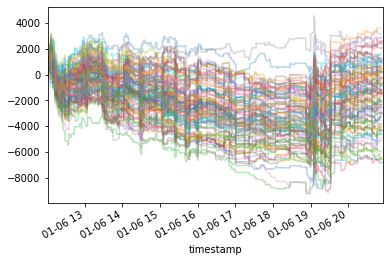

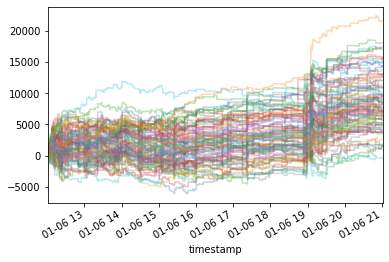

In [46]:
WDO = 'WDOG20'
wdo_all_trades, wdo_all_trades_size = monte_carlo(date = "2020-01-06" , files =all_trades_wdo, symbol = WDO)
dol_all_trades, dol_all_trades_size = monte_carlo(date = "2020-01-06" , files =all_trades_dol, symbol = WDO)

## WITH TRADES

In [47]:
msg_number_wdo_trades = msg_number_wdo[np.isin(msg_number_wdo,list_of_trades)]
msg_number_dol_trades = msg_number_dol[np.isin(msg_number_dol,list_of_trades)]

In [48]:
dict_filter_wdo_w_trades = {}
j = 0
for i in range(len(all_trades_monte_carlo)):
    if all_trades_monte_carlo[i]['react_msg_seq_num'] in (msg_number_wdo_trades):
        dict_filter_wdo_w_trades[j] = all_trades_monte_carlo[i]
        j+=1
        
w_trades_wdo = []
for i in dict_filter_wdo_w_trades.keys():
    w_trades_wdo.append(dict_filter_wdo_w_trades[i])

    
########################DOL###################    

dict_filter_dol_w_trades = {}
j = 0
for i in range(len(all_trades_monte_carlo)):
    if all_trades_monte_carlo[i]['react_msg_seq_num'] in (msg_number_dol_trades):
        dict_filter_dol_w_trades[j] = all_trades_monte_carlo[i]
        j+=1
        
w_all_trades_dol = []
for i in dict_filter_dol_w_trades.keys():
    w_all_trades_dol.append(dict_filter_dol_w_trades[i])

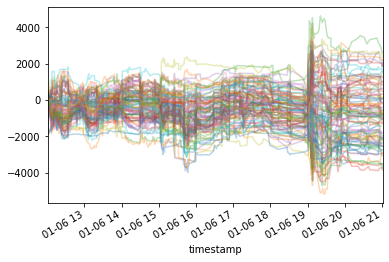

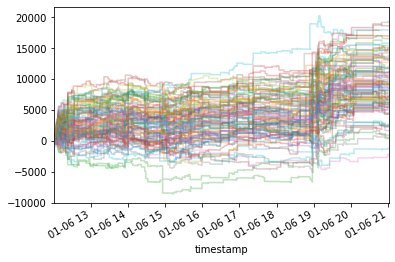

In [55]:
WDO = 'WDOG20'
wdo_w_trades, wdo_w_trades_size = monte_carlo(date = "2020-01-06" , files =w_trades_wdo, symbol = WDO)
dol_w_trades, dol_w_trades_size = monte_carlo(date = "2020-01-06" , files =w_all_trades_dol, symbol = WDO)


## WITHOUT TRADES

In [56]:
msg_number_wdo_w_o_trades = msg_number_wdo[~np.isin(msg_number_wdo,list_of_trades)]
msg_number_dol_w_o_trades = msg_number_dol[~np.isin(msg_number_dol,list_of_trades)]

In [57]:
dict_filter_wdo_w_o_trades = {}
j = 0
for i in range(len(all_trades_monte_carlo)):
    if all_trades_monte_carlo[i]['react_msg_seq_num'] in (msg_number_wdo_w_o_trades):
        dict_filter_wdo_w_o_trades[j] = all_trades_monte_carlo[i]
        j+=1
        
w_o_trades_wdo = []
for i in dict_filter_wdo_w_o_trades.keys():
    w_o_trades_wdo.append(dict_filter_wdo_w_o_trades[i])
    
    
#################DOL#####################    
dict_filter_dol_w_o_trades = {}
j = 0
for i in range(len(all_trades_monte_carlo)):
    if all_trades_monte_carlo[i]['react_msg_seq_num'] in (msg_number_dol_w_o_trades):
        dict_filter_dol_w_o_trades[j] = all_trades_monte_carlo[i]
        j+=1
        
w_o_all_trades_dol = []
for i in dict_filter_dol_w_o_trades.keys():
    w_o_all_trades_dol.append(dict_filter_dol_w_o_trades[i])

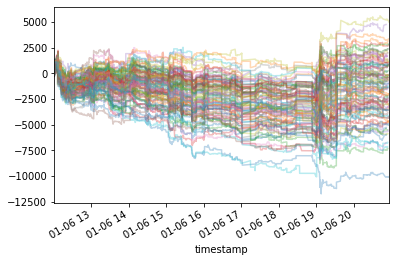

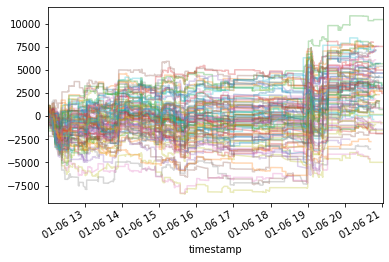

In [58]:
WDO = 'WDOG20'
wdo_w_trades, wdo_w_trades_size = monte_carlo(date = "2020-01-06" , files =w_o_trades_wdo, symbol = WDO)
dol_w_trades, dol_w_trades_size = monte_carlo(date = "2020-01-06" , files =w_o_all_trades_dol, symbol = WDO)

## ESTUDO DE QUANTIDADES - DOL - ALL TRADES


In [59]:
DOL = 'DOLG20'
events_dol = pr.get_parquet(DOL, "2020-01-06", "events")["incremental"].read().to_pandas()

In [60]:
dict_map_qtd = events_dol.set_index("msg_seq_num").to_dict()["quantity"]
df_all_trades = pd.DataFrame(all_trades_dol)
df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

dict_aux = df_all_trades.T.to_dict()

all_trades_dol_qnt = []
for i in dict_aux.keys():
    all_trades_dol_qnt.append(dict_aux[i])

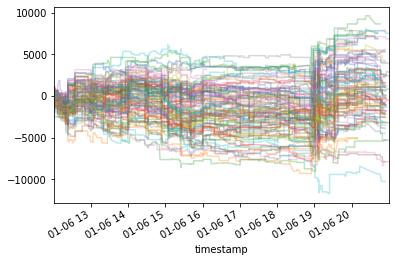

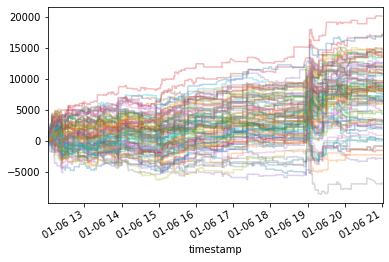

In [62]:
files = qntd_seacher(test= 'equal', all_trades_qnt = all_trades_dol_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
equals5, equals5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

files = qntd_seacher(test= 'bigger', all_trades_qnt = all_trades_dol_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
bigger5, bigger5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

### ESTUDO DE QUANTIDADES - DOL - WITH TRADES


In [64]:
dict_map_qtd = events_dol.set_index("msg_seq_num").to_dict()["quantity"]
df_all_trades = pd.DataFrame(w_all_trades_dol)
df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

dict_aux = df_all_trades.T.to_dict()

all_w_trades_dol_qnt = []
for i in dict_aux.keys():
    all_w_trades_dol_qnt.append(dict_aux[i])

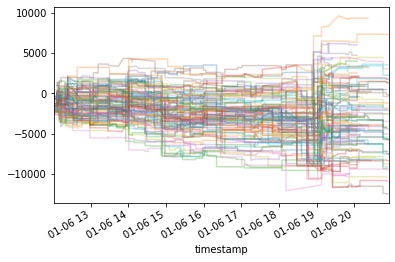

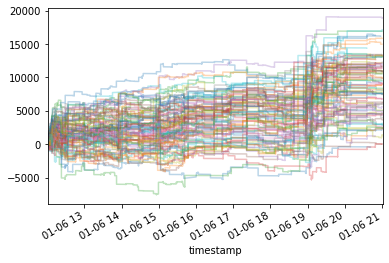

In [65]:
files = qntd_seacher(test= 'equal', all_trades_qnt = all_w_trades_dol_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
equals5, equals5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

files = qntd_seacher(test= 'bigger', all_trades_qnt = all_w_trades_dol_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
bigger5, bigger5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

### ESTUDO DE QUANTIDADES - DOL - WITHOUT TRADES


In [66]:
dict_map_qtd = events_dol.set_index("msg_seq_num").to_dict()["quantity"]
df_all_trades = pd.DataFrame(w_o_all_trades_dol)
df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

dict_aux = df_all_trades.T.to_dict()

all_w_o_trades_dol_qnt = []
for i in dict_aux.keys():
    all_w_o_trades_dol_qnt.append(dict_aux[i])

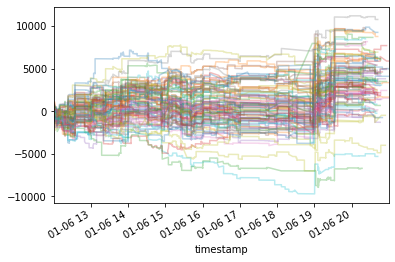

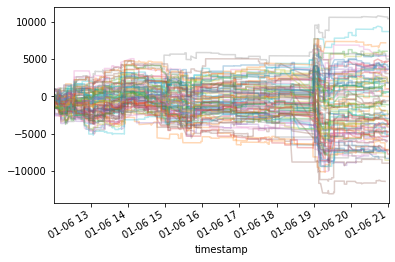

In [67]:
files = qntd_seacher(test= 'equal', all_trades_qnt = all_w_o_trades_dol_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
equals5, equals5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

files = qntd_seacher(test= 'bigger', all_trades_qnt = all_w_o_trades_dol_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
bigger5, bigger5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

## ESTUDO DE QUANTIDADES - WDO - ALL TRADES


In [68]:
WDO = 'WDOG20'
events_wdo = pr.get_parquet(WDO, "2020-01-06", "events")["incremental"].read().to_pandas()

In [69]:
dict_map_qtd = events_wdo.set_index("msg_seq_num").to_dict()["quantity"]
df_all_trades = pd.DataFrame(all_trades_wdo)
df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

dict_aux = df_all_trades.T.to_dict()

all_trades_wdo_qnt = []
for i in dict_aux.keys():
    all_trades_wdo_qnt.append(dict_aux[i])

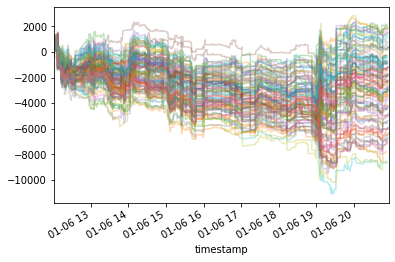

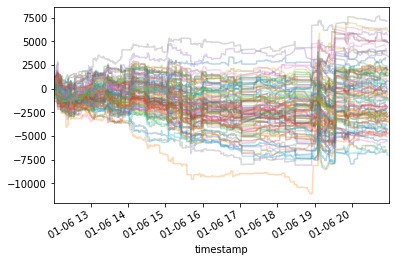

In [70]:
files = qntd_seacher(test= 'equal', all_trades_qnt = all_trades_wdo_qnt , number = 10)
files_list = []
for i in files.keys():
    files_list.append(files[i])
equals5, equals5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

files = qntd_seacher(test= 'bigger', all_trades_qnt = all_trades_wdo_qnt , number = 10)
files_list = []
for i in files.keys():
    files_list.append(files[i])
bigger5, bigger5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

### ESTUDO DE QUANTIDADES - WDO - WITH TRADES


In [71]:
dict_map_qtd = events_wdo.set_index("msg_seq_num").to_dict()["quantity"]
df_all_trades = pd.DataFrame(w_trades_wdo)
df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

dict_aux = df_all_trades.T.to_dict()

all_w_trades_wdo_qnt = []
for i in dict_aux.keys():
    all_w_trades_wdo_qnt.append(dict_aux[i])

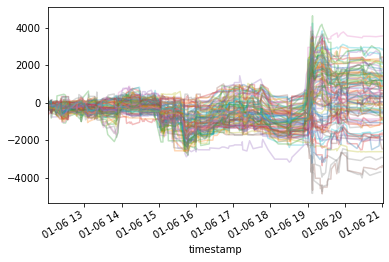

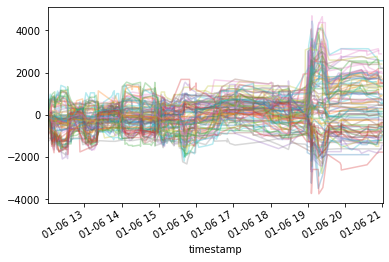

In [75]:
files = qntd_seacher(test= 'equal', all_trades_qnt = all_w_trades_wdo_qnt , number = 10)
files_list = []
for i in files.keys():
    files_list.append(files[i])
equals5, equals5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

files = qntd_seacher(test= 'bigger', all_trades_qnt = all_w_trades_wdo_qnt , number = 10)
files_list = []
for i in files.keys():
    files_list.append(files[i])
bigger5, bigger5_size = monte_carlo(date = "2020-01-06" , files =files_list, symbol = WDO)

### ESTUDO DE QUANTIDADES - WDO - WITHOUT TRADES


In [76]:
dict_map_qtd = events_wdo.set_index("msg_seq_num").to_dict()["quantity"]
df_all_trades = pd.DataFrame(w_o_trades_wdo)
df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

dict_aux = df_all_trades.T.to_dict()

all_w_o_trades_wdo_qnt = []
for i in dict_aux.keys():
    all_w_o_trades_wdo_qnt.append(dict_aux[i])

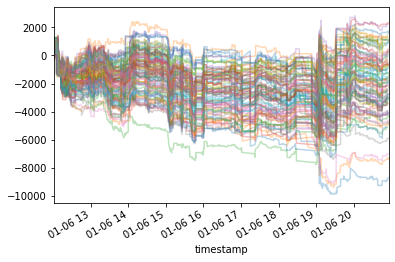

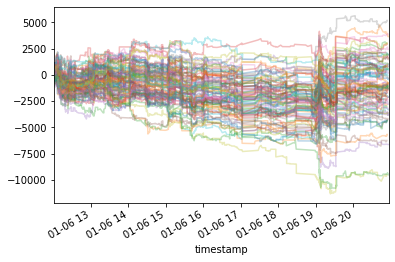

In [77]:
files = qntd_seacher(test= 'equal', all_trades_qnt = all_w_o_trades_wdo_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
equals5, equals5_size = monte_carlo(date = "2020-01-06" , files =files, symbol = WDO)

files = qntd_seacher(test= 'bigger', all_trades_qnt = all_w_o_trades_wdo_qnt , number = 5)
files_list = []
for i in files.keys():
    files_list.append(files[i])
bigger5, bigger5_size = monte_carlo(date = "2020-01-06" , files =files, symbol = WDO)

In [10]:
def _filter(all_trades_monte_carlo_, msg_number):
    dict_filter_wdo_w_trades = {}
    j = 0
    for i in range(len(all_trades_monte_carlo_)):
        if all_trades_monte_carlo_[i]['react_msg_seq_num'] in (msg_number):
            dict_filter_wdo_w_trades[j] = all_trades_monte_carlo_[i]
            j+=1

    w_trades_wdo = []
    for i in dict_filter_wdo_w_trades.keys():
        w_trades_wdo.append(dict_filter_wdo_w_trades[i])
        
    return w_trades_wdo


In [11]:
def all_trades_total(date_):

    all_trades_monte_carlo = manager._get_all_possible_trades(date_, 'Taker', {'signal' : 'book'})  
    MSG_SEQ = []

    # Retorna lista com msg_seq_num unicas
    for i in range(len(all_trades_monte_carlo)):
        MSG_SEQ.append(all_trades_monte_carlo[i].get('react_msg_seq_num'))

    unique_msg = list(set(MSG_SEQ))
    
    return all_trades_monte_carlo, unique_msg

# Analise Mensal

In [12]:
def func_analise_mensal(trade):
    dict_distribution_jan = {}
    dict_distribution_size_jan = {}
    DATE_JAN = [
     '2020-01-02',
     '2020-01-03',
     '2020-01-06',
     '2020-01-07',
     '2020-01-08',
     '2020-01-09', 
     '2020-01-10',
     '2020-01-13',
     '2020-01-14',
     '2020-01-15',
     '2020-01-16',
     '2020-01-17',
     '2020-01-20',
     '2020-01-21',
     '2020-01-22',
     '2020-01-23',
     '2020-01-24',
     '2020-01-27']

    # dict_distribution_jan = {}
    # dict_distribution_size_jan = {}

    j= 0
    DOL = 'DOLG20'
    WDO = 'WDOG20'


    for date_ in DATE_JAN:
         # Carrega arquivos de eventos
#         events_dol = pr.get_parquet(DOL, date_, "events")["incremental"].read().to_pandas()
        events_wdo = pr.get_parquet(WDO, date_, "events")["incremental"].read().to_pandas()
        
        # Carrega arquivos de trades
        md_trades, md_trades_wdo = get_trades(DOL, WDO, date_)
        all_trades =  pd.concat([md_trades,md_trades_wdo]).sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()
        list_of_trades = all_trades.groupby('msg_seq_num').sum().index
        
        # Carrega todas as possibilidades de trade do modelo
        all_trades_monte_carlo, unique_msg = all_trades_total(date_)
        
        #Filtra operações do modelo de insert
        msg_number_wdo = events_wdo[ (events_wdo['msg_seq_num'].isin(unique_msg)) & (events_wdo['event_type'] == 'INSERT') ]['msg_seq_num'].values
        
        # Filtra operções de TRADE
        msg_number_wdo_trades = msg_number_wdo[np.isin(msg_number_wdo,list_of_trades)]
        # Filtra operações sem TRADE
        msg_number_wdo_w_o_trades = msg_number_wdo[~np.isin(msg_number_wdo,list_of_trades)]
        
        if trade == 'y':
            files_filtered = _filter(all_trades_monte_carlo,msg_number_wdo_trades)
            
        elif trade == 'n':
            files_filtered = _filter(all_trades_monte_carlo,msg_number_wdo_w_o_trades)

       
        dict_map_qtd = events_wdo.set_index("msg_seq_num").to_dict()["quantity"]
        df_all_trades = pd.DataFrame(files_filtered)
        df_all_trades["qntd"] = df_all_trades["react_msg_seq_num"].map(dict_map_qtd)

        dict_aux = df_all_trades.T.to_dict()

        all_trades_qnt = []
        for i in dict_aux.keys():
            all_trades_qnt.append(dict_aux[i])


        files = qntd_seacher(test= 'equal', all_trades_qnt = all_trades_qnt , number = 10)
        
        files_list = []
        for i in files.keys():
            files_list.append(files[i])

        equals5, equals5_size = monte_carlo(date = date_ , files =files_list, symbol = WDO)
        
            
        files = qntd_seacher(test= 'bigger', all_trades_qnt = all_trades_qnt , number = 10)
        
        files_list = []
        for i in files.keys():
            files_list.append(files[i])
            
        bigger5, bigger5_size = monte_carlo(date = date_ , files =files_list, symbol = WDO)

        dict_distribution_jan[j] = pd.DataFrame([equals5, bigger5])
        dict_distribution_size_jan[j] = pd.DataFrame([equals5_size, bigger5_size])

    #     dict_distribution_jan[j] = pd.DataFrame([equals5, bigger5])
    #     dict_distribution_size_jan[j] = pd.DataFrame([equals5_size, bigger5_size])

        j+=1
    return dict_distribution_jan, dict_distribution_size_jan

In [13]:
# WDO - WITH TRADES
wdo_w_t_dist, wdo_w_t_dist_size = func_analise_mensal(trade = 'y')

[ MANAGER ] Downloading results


/home/asimovws/.local/lib/python3.6/site-packages/asimov_strategy/fees/dol_fees.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trades['quantity'][df_trades['side'] == 1] *= -1


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


[ MANAGER ] Downloading results


In [20]:
# WDO - WITHOUT TRADES 
wdo_w_o_t_dist, wdo_w_o_t_dist_size = func_analise_mensal(trade = 'n')

KeyboardInterrupt: 

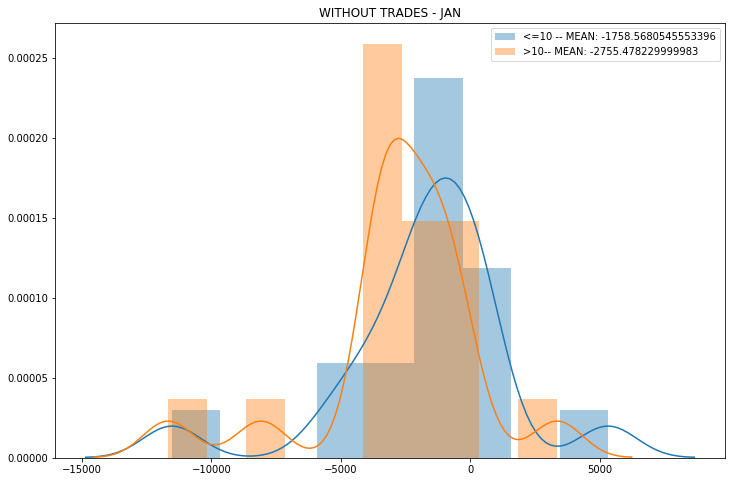

In [25]:
Mean5 = []
Mean_b_5 = []
for j in wdo_w_t_dist.keys():
    Mean5.append(np.mean(wdo_w_o_t_dist[j].values[0]))
    Mean_b_5.append(np.mean(wdo_w_o_t_dist[j].values[1]))
    
fig, ax = plt.subplots(figsize=(12,8))

sns.distplot(Mean5, label = '<=10 -- MEAN: {}'.format(np.mean(Mean5)) )
sns.distplot(Mean_b_5, label = '>10-- MEAN: {}'.format(np.mean(Mean_b_5)))


ax.set_title('WITHOUT TRADES - JAN')
# sns.distplot(C_, label = 'All')
ax.legend()

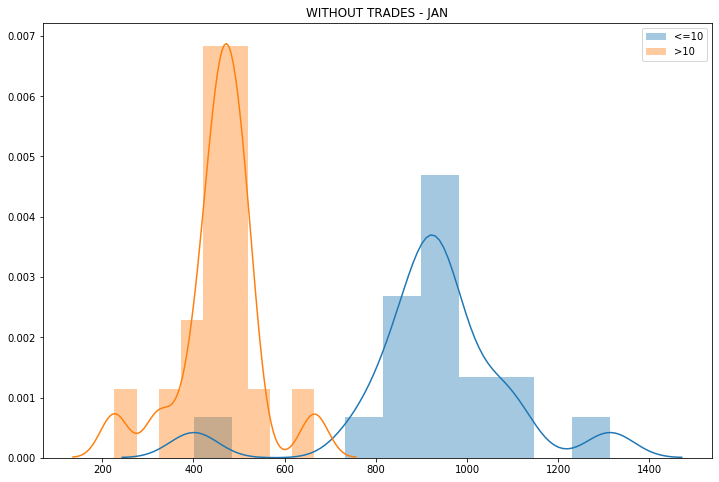

In [28]:
Mean5_size = []
Mean_b_5_size = []
for j in wdo_w_t_dist_size.keys():
    Mean5_size.append(np.mean(wdo_w_o_t_dist_size[j].values[0]))
    Mean_b_5_size.append(np.mean(wdo_w_o_t_dist_size[j].values[1]))


fig, ax = plt.subplots(figsize=(12,8))

sns.distplot(Mean5_size, label = '<=10')
sns.distplot(Mean_b_5_size, label = '>10')


ax.set_title('WITHOUT TRADES - JAN')
# sns.distplot(C_, label = 'All')
ax.legend()

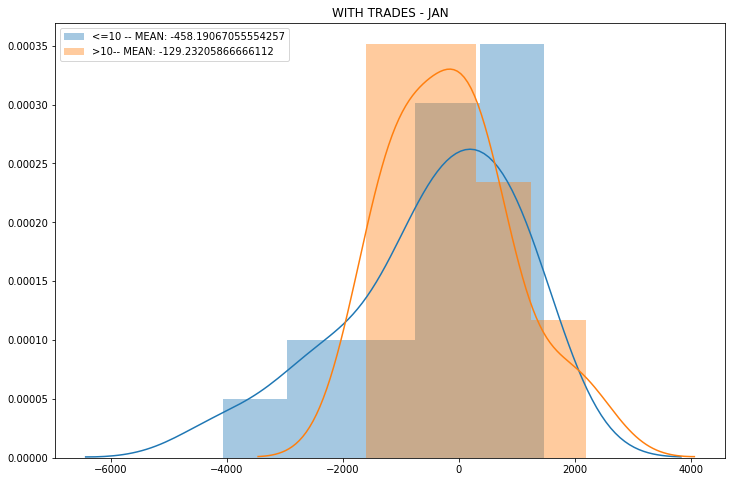

In [30]:
Mean5 = []
Mean_b_5 = []
for j in wdo_w_t_dist.keys():
    Mean5.append(np.mean(wdo_w_t_dist[j].values[0]))
    Mean_b_5.append(np.mean(wdo_w_t_dist[j].values[1]))
    
fig, ax = plt.subplots(figsize=(12,8))

sns.distplot(Mean5, label = '<=10 -- MEAN: {}'.format(np.mean(Mean5)) )
sns.distplot(Mean_b_5, label = '>10-- MEAN: {}'.format(np.mean(Mean_b_5)))


ax.set_title('WITH TRADES - JAN')
# sns.distplot(C_, label = 'All')
ax.legend()

In [31]:
Mean5_size = []
Mean_b_5_size = []
for j in wdo_w_t_dist_size.keys():
    Mean5_size.append(np.mean(wdo_w_t_dist_size[j].values[0]))
    Mean_b_5_size.append(np.mean(wdo_w_t_dist_size[j].values[1]))

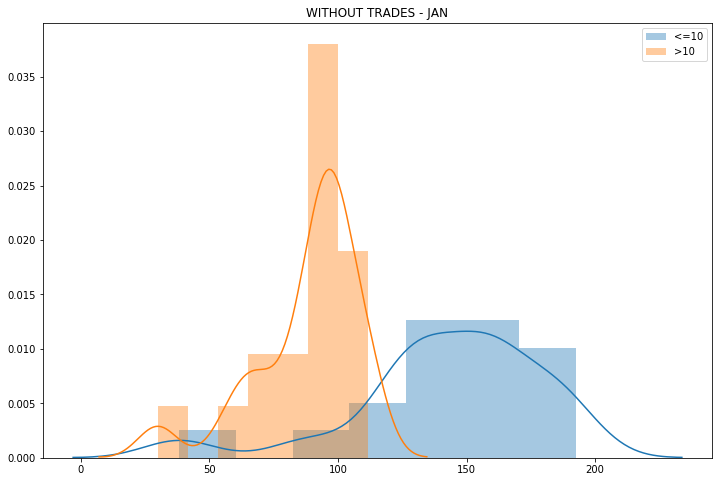

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

sns.distplot(Mean5_size, label = '<=10')
sns.distplot(Mean_b_5_size, label = '>10')


ax.set_title('WITHOUT TRADES - JAN')
# sns.distplot(C_, label = 'All')
ax.legend()